# O que é Spark?

Apache Spark é uma plataforma de computação em cluster de código aberto, projetada para processamento de dados em larga escala. Desenvolvido originalmente na Universidade da Califórnia em Berkeley, o Spark foi projetado para ser rápido e eficiente em operações de análise de dados e processamento de grandes volumes de dados. Ele se destaca em tarefas que exigem processamento de dados em tempo real ou análise interativa de grandes conjuntos de dados.

O Spark vem com vários componentes integrados que estendem suas capacidades:

* **Spark SQL** para processamento de dados estruturados via SQL e DataFrames.
* **Spark Streaming** para análise e processamento de dados em tempo real.
* **MLlib** para aprendizado de máquina.
* **GraphX** para processamento de grafos.


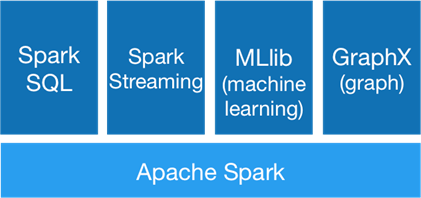

# Arquitetura do Spark

**A arquitetura de uma aplicação Spark é constituída por três partes principais:**

* O **Driver Program**, que é a aplicação principal que gerencia a criação e é quem executará o processamento definido pelo programados;
* O **Cluster Manager** é um componente opcional que só é necessário se o Spark for executado de forma distribuída. Ele é responsável por administrar as máquinas que serão utilizadas como workers;
* Os **Workers** , que são as máquinas que realmente executarão as tarefas que são enviadas pelo Driver Program. Se o Spark for executado de forma local, a máquina desempenhará tanto o papel de Driver Program como de Worker.

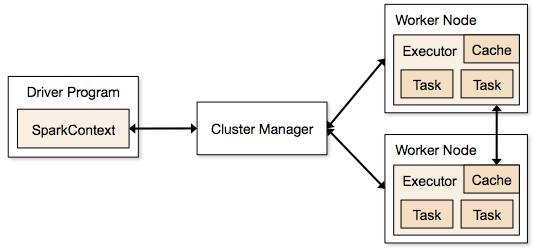

Existem três conceitos fundamentais que serão utilizados em todas as aplicações desenvolvidas:

* **Resilient Distributed Datasets (RDD)**: abstraem um conjunto de objetos distribuídos no cluster, geralmente executados na memória principal. Estes podem estar armazenados em sistemas de arquivo tradicional, no HDFS (HadoopDistributed File System) e em alguns Banco de Dados NoSQL, como Cassandra e HBase. Ele é o objeto principal do modelo de programação do Spark, pois são nesses objetos que serão executados os processamentos dos dados.
* **Operações**: representam transformações (como agrupamentos, filtros e mapeamentos entre os dados) ou ações (como contagens e persistências) que são realizados em um RDD. Um programa Spark normalmente é definido como uma sequência de transformações ou ações que são realizadas em um conjunto de dados.
* **Spark Context**: o contexto é o objeto que conecta o Spark ao programa que está sendo desenvolvido. Ele pode ser acessado como uma variável em um programa que para utilizar os seus recursos.

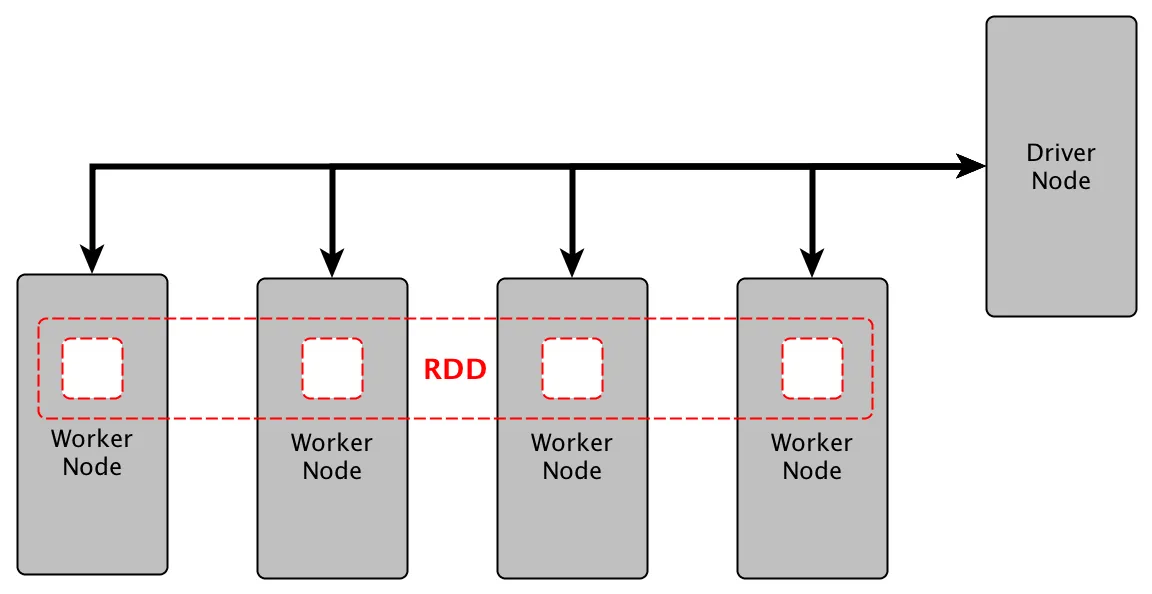

# E o PySpark?

O PySpark é a interface do Apache Spark para a linguagem de programação Python. Ele combina a simplicidade e a popularidade do Python com a poderosa capacidade de processamento de dados do Spark, tornando-se uma ferramenta muito útil para cientistas de dados, engenheiros de dados, e desenvolvedores que precisam processar grandes volumes de dados de forma eficiente.

**APIs de Alto Nível**: PySpark fornece APIs de alto nível para DataFrames e DataSets, que permitem realizar operações complexas de maneira simples e concisa. Estas APIs são projetadas para construir pipelines de processamento de dados de forma eficiente e com menos código.

**É adequado para datasets que excedem a memória de uma única máquina.**

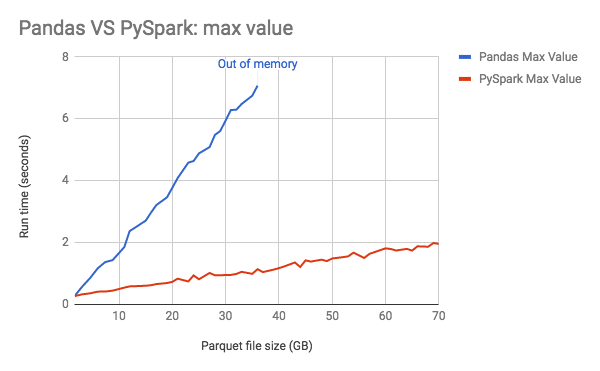


# Referencias

*   [Apache Spark Fundamentals](https://medium.com/@lavishj77/spark-fundamentals-part-2-a2d1a78eff73)
*   [Introdução ao Apache Spark](https://www.devmedia.com.br/introducao-ao-apache-spark/34178)
*   [Resilient Distributed Dataset (RDD)](https://www.databricks.com/glossary/what-is-rdd)
*   [O que é Apache Spark?](https://cloud.google.com/learn/what-is-apache-spark?hl=pt-br)
*   [PySpark vs Pandas: Performance, Memory Consumption and Use Cases](https://www.codeconquest.com/blog/pyspark-vs-pandas-performance-memory-consumption-and-use-cases/)
*   [Benchmarking Apache Spark on a Single Node Machine
](https://www.databricks.com/blog/2018/05/03/benchmarking-apache-spark-on-a-single-node-machine.html)
*   [Benchmarking Pandas VS Spark](https://hirazone.medium.com/benchmarking-pandas-vs-spark-7f7166984de2)
*   [Quickstart: DataFrame](https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_df.html)











## **Configuração do ambiente**

In [ ]:
# Instalação do pyspark e findspark
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=78843b141865fd54b93411ab959f1d9f5507ce3a8bfa8270530155d192b76d3e
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# Importa o findspark e inicializa a sessão Spark
import findspark
findspark.init()

# Importa os módulos necessários do PySpark
from pyspark.sql import SparkSession

# Configuração da sessão Spark
spark = SparkSession.builder \
    .appName("intro_pyspark") \
    .master("local[*]") \
    .getOrCreate()

# Verifica se a sessão Spark foi configurada corretamente
spark

In [ ]:
# Carregar o arquivo CSV
%time
df = spark.read.csv('/content/data_big.csv', header=True, inferSchema=True)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


## **Visualização do dataframe**

In [ ]:
%time
from pyspark.sql.functions import desc

# Exibir os últimos registros do DataFrame
df.tail(5)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


[Row(Code=8768, Net Salary=6521.32, Gross Salary=7828.27, Occupation='Archivist', City='Vanessamouth', First Name='Matthew', Last Name='Anderson', Credit Score=384, Gender='Non-Binary', Age=23, Account Balance=43494.76, Number of Accounts=3, Number of Products=1, Loan='Yes', Investment=None, Credit Card Limit=7041.89, Start Date=datetime.date(2016, 10, 29), End Date=None),
 Row(Code=6432, Net Salary=4549.63, Gross Salary=6473.61, Occupation='Police officer', City='East Albert', First Name='Christina', Last Name='Santiago', Credit Score=574, Gender='Male', Age=45, Account Balance=9857.24, Number of Accounts=4, Number of Products=1, Loan='No', Investment='Yes', Credit Card Limit=3989.85, Start Date=datetime.date(2020, 1, 22), End Date=None),
 Row(Code=8940, Net Salary=9383.46, Gross Salary=11563.89, Occupation='Art gallery manager', City='Turnerfurt', First Name='Cynthia', Last Name='Buckley', Credit Score=420, Gender='Female', Age=63, Account Balance=96893.93, Number of Accounts=2, Numb

In [ ]:
%time

# Exibir os primeiros registros do DataFrame
#df.tail(1).toPandas()
df.head()

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10 µs


Row(Code=7144, Net Salary=7891.33, Gross Salary=10255.14, Occupation='Lawyer', City='Reedfort', First Name='Kurt', Last Name='Huang', Credit Score=694, Gender='Male', Age=32, Account Balance=52481.75, Number of Accounts=5, Number of Products=10, Loan=None, Investment='Yes', Credit Card Limit=1844.6, Start Date=datetime.date(2020, 4, 24), End Date=None)

In [ ]:
%time
## head()
df.show()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.63 µs
+----+----------+------------+--------------------+------------------+----------+-----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|Code|Net Salary|Gross Salary|          Occupation|              City|First Name|  Last Name|Credit Score|    Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|  End Date|
+----+----------+------------+--------------------+------------------+----------+-----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|7144|   7891.33|    10255.14|              Lawyer|          Reedfort|      Kurt|      Huang|         694|      Male| 32|       52481.75|                 5|                10|NULL|       Yes|           1844.6|2020-04-24|      NULL|
|659

In [ ]:
%time
#visualização vertical das colunas
df.show(vertical=True)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
-RECORD 0----------------------------------
 Code               | 7144                 
 Net Salary         | 7891.33              
 Gross Salary       | 10255.14             
 Occupation         | Lawyer               
 City               | Reedfort             
 First Name         | Kurt                 
 Last Name          | Huang                
 Credit Score       | 694                  
 Gender             | Male                 
 Age                | 32                   
 Account Balance    | 52481.75             
 Number of Accounts | 5                    
 Number of Products | 10                   
 Loan               | NULL                 
 Investment         | Yes                  
 Credit Card Limit  | 1844.6               
 Start Date         | 2020-04-24           
 End Date           | NULL                 
-RECORD 1----------------------------------
 Code               | 6596                 
 Net Salary 

In [ ]:
#visualizar as colunas do dataframe
df.columns

['Code',
 'Net Salary',
 'Gross Salary',
 'Occupation',
 'City',
 'First Name',
 'Last Name',
 'Credit Score',
 'Gender',
 'Age',
 'Account Balance',
 'Number of Accounts',
 'Number of Products',
 'Loan',
 'Investment',
 'Credit Card Limit',
 'Start Date',
 'End Date']

In [ ]:
#resume o dataframe
df.printSchema()

root
 |-- Code: integer (nullable = true)
 |-- Net Salary: double (nullable = true)
 |-- Gross Salary: double (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- City: string (nullable = true)
 |-- First Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Credit Score: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Account Balance: double (nullable = true)
 |-- Number of Accounts: integer (nullable = true)
 |-- Number of Products: integer (nullable = true)
 |-- Loan: string (nullable = true)
 |-- Investment: string (nullable = true)
 |-- Credit Card Limit: double (nullable = true)
 |-- Start Date: date (nullable = true)
 |-- End Date: date (nullable = true)



In [ ]:
df

DataFrame[Code: int, Net Salary: double, Gross Salary: double, Occupation: string, City: string, First Name: string, Last Name: string, Credit Score: int, Gender: string, Age: int, Account Balance: double, Number of Accounts: int, Number of Products: int, Loan: string, Investment: string, Credit Card Limit: double, Start Date: date, End Date: date]

In [ ]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
df

Code,Net Salary,Gross Salary,Occupation,City,First Name,Last Name,Credit Score,Gender,Age,Account Balance,Number of Accounts,Number of Products,Loan,Investment,Credit Card Limit,Start Date,End Date
7144,7891.33,10255.14,Lawyer,Reedfort,Kurt,Huang,694,Male,32,52481.75,5,10,NULL,Yes,1844.6,2020-04-24,NULL
6596,3632.26,4079.33,Automotive engineer,Lake Bridget,Lisa,Blankenship,440,Non-Binary,49,32122.49,5,3,NULL,No,1083.45,2021-06-23,2023-02-07
7120,9984.93,14058.83,Systems developer,East Davidmouth,Amanda,Rojas,482,Male,24,27343.12,4,8,Yes,No,6314.58,2020-01-22,NULL
5816,6905.21,9115.37,"Research officer,...",East Michael,Kimberly,Bennett,323,Female,54,50154.69,5,5,NULL,NULL,2300.09,2018-07-20,NULL
4984,8142.29,10837.0,Curator,Alisonchester,Roger,Haley,398,Female,22,89224.62,1,5,NULL,Yes,5149.37,2019-09-27,NULL
3477,6457.93,8596.56,Site engineer,Veronicaberg,Michele,Massey,356,Female,54,93938.59,5,1,No,NULL,9673.54,2020-12-26,2021-06-07
3454,2066.27,2449.17,Chartered legal e...,Nealbury,Teresa,Moore,610,Non-Binary,57,86671.28,1,8,No,NULL,6946.54,2021-04-04,2022-08-06
5543,5923.38,7184.64,Chief Operating O...,New Lorraineberg,Lacey,Vargas,758,Male,27,70675.47,4,6,NULL,NULL,7243.11,2021-11-08,NULL
4614,3055.84,3710.17,Chief Operating O...,South Lauraport,Rodney,Jackson,789,Male,30,70487.31,3,9,Yes,No,3457.29,2015-06-10,2020-10-30
2602,6688.5,9423.67,Tour manager,Jonesshire,April,Cisneros,517,Female,45,86634.23,3,3,NULL,NULL,6898.68,2022-08-20,2022-08-23


**Obs**:
A configuração **spark.sql.repl.eagerEval.enabled** controla se a avaliação de expressões SQL no PySpark é feita de forma imediata (eager evaluation) ou adiada (lazy evaluation) em ambientes interativos, como o Jupyter Notebook. Aqui está uma explicação detalhada:

Avaliação Eager (Immediate Evaluation):

Quando essa configuração está ativada (com o valor true), as expressões SQL são avaliadas imediatamente.
Isso significa que, ao executar um comando SQL, o resultado será computado imediatamente e retornado.
Isso pode ser útil para ambientes interativos, onde o usuário deseja ver o resultado imediatamente após a execução de uma consulta ou operação.
Avaliação Preguiçosa (Lazy Evaluation):

Quando essa configuração está desativada (com o valor false, que é o padrão), as expressões SQL são avaliadas de forma adiada.
Isso significa que a avaliação e a execução das operações são postergadas até que seja realmente necessário, como quando é solicitada uma ação de coleta (collect, show, etc.).
Esse é o comportamento padrão do PySpark e é ideal para trabalhar com grandes volumes de dados, já que as operações são otimizadas e executadas de forma eficiente.
Em resumo, ao habilitar spark.sql.repl.eagerEval.enabled, você está optando por ter uma avaliação imediata das consultas SQL em ambientes interativos, enquanto a desativação mantém o comportamento padrão de avaliação preguiçosa, adiando a execução até que seja necessário. A escolha entre essas opções depende das necessidades do seu fluxo de trabalho e do volume de dados com que está trabalhando.

In [ ]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', False)


In [ ]:
df.describe().show()

+-------+-----------------+------------------+-----------------+------------------+-----------+----------+---------+------------------+----------+-----------------+------------------+------------------+------------------+------+----------+------------------+
|summary|             Code|        Net Salary|     Gross Salary|        Occupation|       City|First Name|Last Name|      Credit Score|    Gender|              Age|   Account Balance|Number of Accounts|Number of Products|  Loan|Investment| Credit Card Limit|
+-------+-----------------+------------------+-----------------+------------------+-----------+----------+---------+------------------+----------+-----------------+------------------+------------------+------------------+------+----------+------------------+
|  count|           230720|            230720|           230720|            230720|     230720|    230720|   230720|            230720|    230720|           230720|            230720|            230720|            230720|15

In [ ]:
%time

df.collect()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs


[Row(Code=7144, Net Salary=7891.33, Gross Salary=10255.14, Occupation='Lawyer', City='Reedfort', First Name='Kurt', Last Name='Huang', Credit Score=694, Gender='Male', Age=32, Account Balance=52481.75, Number of Accounts=5, Number of Products=10, Loan=None, Investment='Yes', Credit Card Limit=1844.6, Start Date=datetime.date(2020, 4, 24), End Date=None),
 Row(Code=6596, Net Salary=3632.26, Gross Salary=4079.33, Occupation='Automotive engineer', City='Lake Bridget', First Name='Lisa', Last Name='Blankenship', Credit Score=440, Gender='Non-Binary', Age=49, Account Balance=32122.49, Number of Accounts=5, Number of Products=3, Loan=None, Investment='No', Credit Card Limit=1083.45, Start Date=datetime.date(2021, 6, 23), End Date=datetime.date(2023, 2, 7)),
 Row(Code=7120, Net Salary=9984.93, Gross Salary=14058.83, Occupation='Systems developer', City='East Davidmouth', First Name='Amanda', Last Name='Rojas', Credit Score=482, Gender='Male', Age=24, Account Balance=27343.12, Number of Accoun

**Obs**: O método **DataFrame.collect()** no PySpark é utilizado para coletar todos os dados de um DataFrame distribuído para o lado do driver como uma lista de registros. Cada registro é representado como uma linha no DataFrame. Esse método é muito útil quando você precisa trazer os dados distribuídos para o espaço de memória local para fazer operações que exigem acesso aos dados completos, como converter os dados para uma estrutura de dados Python ou imprimir os dados para inspeção.

No entanto, é importante usar collect() com cautela, especialmente com grandes conjuntos de dados. Como ele transfere todos os dados para a máquina do driver, isso pode facilmente exceder a memória disponível e causar um erro de falta de memória (OutOfMemoryError). Isso acontece porque, diferentemente das operações distribuídas que dividem os dados em partições gerenciáveis, collect() tenta armazenar todo o conjunto de dados na memória do driver de uma só vez.

Em resumo, collect() é uma ferramenta poderosa para trazer dados distribuídos para análise local, mas deve ser usado com discernimento e geralmente em volumes de dados que você sabe que são pequenos o suficiente para serem gerenciados pela memória do driver. Para conjuntos de dados maiores, métodos como show(), take(), ou operações de agregação que resumem os dados antes de coletá-los, podem ser mais apropriados.

Quando falamos sobre um **"DataFrame distribuído"** em contextos como PySpark (a versão do Spark para Python), estamos nos referindo a dados que são armazenados e processados em um cluster de computadores, e não em uma única máquina. Isso permite o processamento de grandes volumes de dados de maneira eficiente, dividindo o trabalho entre várias máquinas. Cada máquina do cluster trabalha com sua parcela dos dados, executando tarefas em paralelo.

O **"lado do driver"** é o ponto central de controle em uma aplicação Spark. O driver é onde seu programa Spark é executado, e é responsável por:

Converter o programa em tarefas a serem executadas nos nós executores (as máquinas do cluster que executam as operações de dados).
Agendar as tarefas nos executores.
Coletar os resultados das tarefas executadas pelos executores.
Quando dizemos que um DataFrame distribuído é trazido "para o lado do driver", estamos descrevendo o processo pelo qual os resultados das operações distribuídas—que foram realizadas nos diversos executores—são coletados e agregados no driver. Isso é útil quando precisamos visualizar os dados, fazer análises locais ou exportar os resultados para sistemas externos que não estão distribuídos.

A operação de coleta de dados distribuídos no driver, como mencionado anteriormente, pode ser feita usando o método .collect() de um DataFrame. Isso resulta em uma lista de registros (linhas) sendo armazenada na memória do driver. Entretanto, é uma operação potencialmente perigosa para grandes conjuntos de dados, pois pode consumir toda a memória disponível no driver, levando a erros de falta de memória.

In [ ]:
%time
df_ = df.toPandas()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


In [ ]:
df_.tail()

,Code,Net Salary,Gross Salary,Occupation,City,First Name,Last Name,Credit Score,Gender,Age,Account Balance,Number of Accounts,Number of Products,Loan,Investment,Credit Card Limit,Start Date,End Date
230715,8768,6521.32,7828.27,Archivist,Vanessamouth,Matthew,Anderson,384,Non-Binary,23,43494.76,3,1,Yes,None,7041.89,2016-10-29,None
230716,6432,4549.63,6473.61,Police officer,East Albert,Christina,Santiago,574,Male,45,9857.24,4,1,No,Yes,3989.85,2020-01-22,None
230717,8940,9383.46,11563.89,Art gallery manager,Turnerfurt,Cynthia,Buckley,420,Female,63,96893.93,2,5,None,Yes,5241.30,2019-08-25,None
230718,5422,8545.28,10417.73,"Investment banker, operational",Port Wendyside,Michael,Mitchell,585,Male,73,24647.55,3,2,No,Yes,5791.38,2018-12-16,None
230719,4589,8621.96,12201.61,General practice doctor,Haleyfurt,Calvin,Contreras,415,Non-Binary,54,96488.19,3,2,No,Yes,611.67,2017-11-29,None


## **Selecionando e acessando os dados**

In [ ]:
df.Code

Column<'Code'>

In [ ]:
df.select(df.Code).show()

+----+
|Code|
+----+
|7144|
|6596|
|7120|
|5816|
|4984|
|3477|
|3454|
|5543|
|4614|
|2602|
|3908|
|7519|
|7690|
|9141|
|5191|
|2130|
|5825|
|1668|
|2031|
|2238|
+----+
only showing top 20 rows



In [ ]:
df.select("Gross Salary", "Occupation", "City").describe().show()

+-------+-----------------+------------------+-----------+
|summary|     Gross Salary|        Occupation|       City|
+-------+-----------------+------------------+-----------+
|  count|           230720|            230720|     230720|
|   mean|7228.381801014239|              NULL|       NULL|
| stddev|3135.765837929181|              NULL|       NULL|
|    min|          1669.46|Academic librarian|  Aaronberg|
|    max|          14256.3|      Youth worker|Zunigaville|
+-------+-----------------+------------------+-----------+



In [ ]:
df.select("Gross Salary", "Occupation", "City").show()

+------------+--------------------+------------------+
|Gross Salary|          Occupation|              City|
+------------+--------------------+------------------+
|    10255.14|              Lawyer|          Reedfort|
|     4079.33| Automotive engineer|      Lake Bridget|
|    14058.83|   Systems developer|   East Davidmouth|
|     9115.37|Research officer,...|      East Michael|
|     10837.0|             Curator|     Alisonchester|
|     8596.56|       Site engineer|      Veronicaberg|
|     2449.17|Chartered legal e...|          Nealbury|
|     7184.64|Chief Operating O...|  New Lorraineberg|
|     3710.17|Chief Operating O...|   South Lauraport|
|     9423.67|        Tour manager|        Jonesshire|
|     6249.17|Agricultural engi...|    New Aaronshire|
|     6510.69| Animal technologist|         Masonview|
|    10317.23|   Buyer, industrial|       Jacksonview|
|     6291.01|Accountant, chart...|       East Robert|
|     9972.14|      Hydrogeologist|West Jenniferburgh|
|    12386

In [ ]:
df.filter(df.Occupation == 'Lawyer').show()

+----+----------+------------+----------+--------------------+----------+---------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|Code|Net Salary|Gross Salary|Occupation|                City|First Name|Last Name|Credit Score|    Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|  End Date|
+----+----------+------------+----------+--------------------+----------+---------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|7144|   7891.33|    10255.14|    Lawyer|            Reedfort|      Kurt|    Huang|         694|      Male| 32|       52481.75|                 5|                10|NULL|       Yes|           1844.6|2020-04-24|      NULL|
|8010|   2221.32|     3122.37|    Lawyer|       Petersonmouth|     James|Gillespie|         800|    Female| 25| 

In [ ]:
df.filter(df['Credit Score'] > 600).show()

+----+----------+------------+--------------------+-----------------+----------+----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|Code|Net Salary|Gross Salary|          Occupation|             City|First Name| Last Name|Credit Score|    Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|  End Date|
+----+----------+------------+--------------------+-----------------+----------+----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|7144|   7891.33|    10255.14|              Lawyer|         Reedfort|      Kurt|     Huang|         694|      Male| 32|       52481.75|                 5|                10|NULL|       Yes|           1844.6|2020-04-24|      NULL|
|3454|   2066.27|     2449.17|Chartered legal e...|         Nealbury|    Teresa|

In [ ]:
from pyspark.sql.functions import col

df.filter(col('Credit Score') > 600).show()

+----+----------+------------+--------------------+-----------------+----------+----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|Code|Net Salary|Gross Salary|          Occupation|             City|First Name| Last Name|Credit Score|    Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|  End Date|
+----+----------+------------+--------------------+-----------------+----------+----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|7144|   7891.33|    10255.14|              Lawyer|         Reedfort|      Kurt|     Huang|         694|      Male| 32|       52481.75|                 5|                10|NULL|       Yes|           1844.6|2020-04-24|      NULL|
|3454|   2066.27|     2449.17|Chartered legal e...|         Nealbury|    Teresa|

In [ ]:
df.filter(col('Credit Score') > 600).orderBy("Net Salary", ascending=True).show()

+----+----------+------------+--------------------+-----------------+----------+----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|Code|Net Salary|Gross Salary|          Occupation|             City|First Name| Last Name|Credit Score|    Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|  End Date|
+----+----------+------------+--------------------+-----------------+----------+----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|3664|   1500.08|     1931.69|      Therapist, art| South Jaclynfurt|     Jason|     Cross|         706|      Male| 71|       22792.95|                 3|                 1|NULL|      NULL|          5694.09|2019-07-10|      NULL|
|5936|   1500.18|     1798.18|      Prison officer|        Paulmouth|  Jennifer|

In [ ]:
df.filter((col('Credit Score') > 600) & (col('Occupation') == 'Medical secretary')).orderBy("Net Salary", ascending=True).show()

+----+----------+------------+-----------------+-----------------+----------+----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|Code|Net Salary|Gross Salary|       Occupation|             City|First Name| Last Name|Credit Score|    Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|  End Date|
+----+----------+------------+-----------------+-----------------+----------+----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|1676|   1677.75|     1867.66|Medical secretary|        Evanstown|    Travis|    George|         766|    Female| 58|       76206.02|                 3|                 3| Yes|      NULL|          4342.15|2021-07-23|      NULL|
|9013|   1721.94|     2235.15|Medical secretary|Port Michellefurt|     Jamie|  Morrison|    

In [ ]:
df.filter((col('Credit Score') > 600) & (col('Occupation') == 'Therapist'))\
  .orderBy("Net Salary", ascending=True)\
  .show()

+----+----------+------------+----------+----+----------+---------+------------+------+---+---------------+------------------+------------------+----+----------+-----------------+----------+--------+
|Code|Net Salary|Gross Salary|Occupation|City|First Name|Last Name|Credit Score|Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|End Date|
+----+----------+------------+----------+----+----------+---------+------------+------+---+---------------+------------------+------------------+----+----------+-----------------+----------+--------+
+----+----------+------------+----------+----+----------+---------+------------+------+---+---------------+------------------+------------------+----+----------+-----------------+----------+--------+



In [ ]:
df.filter(col('Occupation').like('%Therapist%')).show()

+----+----------+------------+--------------------+----------------+----------+---------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|Code|Net Salary|Gross Salary|          Occupation|            City|First Name|Last Name|Credit Score|    Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|  End Date|
+----+----------+------------+--------------------+----------------+----------+---------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|4511|   7962.19|     9885.29|    Therapist, drama|     Waltersland|    Pamela| Bradford|         601|Non-Binary| 35|        96430.4|                 1|                10|  No|        No|          2492.43|2022-01-14|      NULL|
|4584|   4610.18|     5991.82|Therapist, hortic...|     West Leslie|  Patricia| Friedman

In [ ]:
df.filter(col('Occupation').like('%Therapist%art')).show()

+----+----------+------------+--------------+--------------------+----------+---------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|Code|Net Salary|Gross Salary|    Occupation|                City|First Name|Last Name|Credit Score|    Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|  End Date|
+----+----------+------------+--------------+--------------------+----------+---------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|8404|   4690.31|     5839.13|Therapist, art|       Stephanieberg|     Kylie|   Wilson|         819|Non-Binary| 39|        61138.5|                 4|                 7|NULL|        No|          5154.73|2017-01-22|2018-01-30|
|2382|   8106.68|    10774.33|Therapist, art|        North Eugene|   Tiffany|   Wilson|         

In [ ]:
df.filter((col('Credit Score') > 600).like('%Therapist%art')).show()

+----+----------+------------+----------+----+----------+---------+------------+------+---+---------------+------------------+------------------+----+----------+-----------------+----------+--------+
|Code|Net Salary|Gross Salary|Occupation|City|First Name|Last Name|Credit Score|Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|End Date|
+----+----------+------------+----------+----+----------+---------+------------+------+---+---------------+------------------+------------------+----+----------+-----------------+----------+--------+
+----+----------+------------+----------+----+----------+---------+------------+------+---+---------------+------------------+------------------+----+----------+-----------------+----------+--------+



**Obs**: A função like não pode ser aplicada diretamente a uma expressão como col('Credit Score') > 600, pois like é uma função para testar se uma coluna de string contém um padrão específico. A função like é usada para filtrar strings com base em padrões de caracteres, onde % é um curinga que representa zero ou mais caracteres e _ representa exatamente um caractere.

Quando você usa col('Credit Score') > 600, isso gera uma expressão booleana, não uma string, então não faz sentido usar like diretamente com isso.

A função like deve ser usada em colunas de string, como você fez corretamente com col('Occupation'). Quando você usa col('Occupation').like('%Therapist%'), está verificando se a coluna Occupation contém a string "Therapist" em qualquer parte da sua string, usando % como um curinga para representar qualquer número de caracteres (inclusive nenhum) antes e depois de "Therapist".

In [ ]:
df.filter((col('Credit Score') > 600) & (col('Occupation').like('%Therapist%art')))\
  .orderBy("Net Salary", ascending=False)\
  .show()

+----+----------+------------+--------------+------------------+----------+----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|Code|Net Salary|Gross Salary|    Occupation|              City|First Name| Last Name|Credit Score|    Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|  End Date|
+----+----------+------------+--------------+------------------+----------+----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|1329|   9748.73|    11916.03|Therapist, art|          Haleland|     James|     Foley|         821|      Male| 72|        9698.23|                 3|                10|  No|        No|          5792.08|2021-01-01|      NULL|
|5654|    9715.0|     12272.9|Therapist, art|       Ashleeburgh|   Colleen|  Martinez|         672| 

In [ ]:
# Registrar o DataFrame como uma tabela temporária
df.createOrReplaceTempView("tabela_csv")

# Executar consulta SQL para filtrar pela coluna 'Age'
resultado = spark.sql("SELECT * FROM tabela_csv WHERE Age > 30")

# Exibir o resultado da consulta
resultado.show()

+----+----------+------------+--------------------+------------------+----------+-----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|Code|Net Salary|Gross Salary|          Occupation|              City|First Name|  Last Name|Credit Score|    Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|  End Date|
+----+----------+------------+--------------------+------------------+----------+-----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|7144|   7891.33|    10255.14|              Lawyer|          Reedfort|      Kurt|      Huang|         694|      Male| 32|       52481.75|                 5|                10|NULL|       Yes|           1844.6|2020-04-24|      NULL|
|6596|   3632.26|     4079.33| Automotive engineer|      Lake Bridget|  

In [ ]:
# Registrar o DataFrame como uma tabela temporária
#df.createOrReplaceTempView("tabela_csv")

# Executar consulta SQL utilizando a cláusula LIKE para filtrar cidades que contêm 'Lake' no nome
resultado1 = spark.sql("SELECT * FROM tabela_csv WHERE City LIKE '%Lake%'")

# Exibir o resultado da consulta
resultado1.show()

+----+----------+------------+--------------------+------------------+----------+-----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|Code|Net Salary|Gross Salary|          Occupation|              City|First Name|  Last Name|Credit Score|    Gender|Age|Account Balance|Number of Accounts|Number of Products|Loan|Investment|Credit Card Limit|Start Date|  End Date|
+----+----------+------------+--------------------+------------------+----------+-----------+------------+----------+---+---------------+------------------+------------------+----+----------+-----------------+----------+----------+
|6596|   3632.26|     4079.33| Automotive engineer|      Lake Bridget|      Lisa|Blankenship|         440|Non-Binary| 49|       32122.49|                 5|                 3|NULL|        No|          1083.45|2021-06-23|2023-02-07|
|5825|   3908.33|     5498.91|Historic building...| Lake Jonathanstad|  

## Agrupando dados

In [ ]:
df.groupby('City').avg().show()

+-----------------+------------------+------------------+------------------+-----------------+------------------+--------------------+-----------------------+-----------------------+----------------------+
|             City|         avg(Code)|   avg(Net Salary)| avg(Gross Salary)|avg(Credit Score)|          avg(Age)|avg(Account Balance)|avg(Number of Accounts)|avg(Number of Products)|avg(Credit Card Limit)|
+-----------------+------------------+------------------+------------------+-----------------+------------------+--------------------+-----------------------+-----------------------+----------------------+
|       New Isaiah|            4543.4|          5565.094|          6877.416|            499.4|              48.2|  43884.490000000005|                    2.6|                    3.2|              3817.968|
|    Pattersonberg|            4759.0|          5384.195|         6521.1375|            422.5|              52.0|            50616.47|                   3.25|                  

In [ ]:
from pyspark.sql.functions import count
grouped_df = df.groupBy("City").agg(count("Code").alias("Total"))
grouped_df.show()

+-----------------+-----+
|             City|Total|
+-----------------+-----+
|       New Isaiah|    5|
|    Pattersonberg|    4|
|   New Angelaside|    2|
|    East Territon|    1|
|    Wilsonchester|   20|
|         Alexfurt|    4|
|    Samanthahaven|    9|
| Port Kennethview|    4|
|       Mathewberg|    3|
|   Port Lisaburgh|    4|
|      Lake Joshua|   66|
|       Forbestown|    1|
|      Austinhaven|   13|
|New Jennifershire|    8|
|     East Patrick|   22|
| West Kennethstad|    3|
|     Kaitlynshire|    3|
|  East Desireeton|    2|
|South Carolynberg|    2|
|       Petersbury|    3|
+-----------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import sum

# Agrupa por Categoria e calcula a soma das vendas
grouped_df = df.groupBy("City").agg(sum("Code").alias("Total"))
grouped_df.show()

+-----------------+------+
|             City| Total|
+-----------------+------+
|       New Isaiah| 22717|
|    Pattersonberg| 19036|
|   New Angelaside| 11089|
|    East Territon|  7146|
|    Wilsonchester|118533|
|         Alexfurt| 33614|
|    Samanthahaven| 35025|
| Port Kennethview| 24013|
|       Mathewberg| 16266|
|   Port Lisaburgh| 23493|
|      Lake Joshua|390247|
|       Forbestown|  8112|
|      Austinhaven| 65134|
|New Jennifershire| 32472|
|     East Patrick|112588|
| West Kennethstad| 11703|
|     Kaitlynshire| 19884|
|  East Desireeton|  3461|
|South Carolynberg| 15535|
|       Petersbury| 18852|
+-----------------+------+
only showing top 20 rows



# Usando funções não nativas

In [ ]:
%run '/content/funcoes.ipynb'


In [ ]:
get_dtype(df,"City")

'string'

In [ ]:
verifica_missing(df, df.columns)

+------------------+------+--------------+-------------+
|Colunas           |Nulos |Strings Vazias|0 ,"0" ou 0.0|
+------------------+------+--------------+-------------+
|Code              |0     |0             |0            |
|Net Salary        |0     |0             |0            |
|Gross Salary      |0     |0             |0            |
|Occupation        |0     |0             |0            |
|City              |0     |0             |0            |
|First Name        |0     |0             |0            |
|Last Name         |0     |0             |0            |
|Credit Score      |0     |0             |0            |
|Gender            |0     |0             |0            |
|Age               |0     |0             |0            |
|Account Balance   |0     |0             |0            |
|Number of Accounts|0     |0             |0            |
|Number of Products|0     |0             |0            |
|Loan              |77127 |0             |0            |
|Investment        |76881 |0   

In [ ]:
exibe_distribuicao(df, 'Gender')


 Proporção das categorias para o atributo "Gender":
+----------+---------+
|Gender    |proporção|
+----------+---------+
|Non-Binary|33.13    |
|Male      |33.42    |
|Female    |33.46    |
+----------+---------+

